In [ ]:
import sys
!{sys.executable} -m spacy download en_core_web_sm
import re, numpy as np, pandas as pd
from pprint import pprint

from IPython.display import Image
from IPython.display import display
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize;

import matplotlib.pyplot as plt

# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import FreqDist
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

#suppress all warnings with this
import warnings
warnings.filterwarnings("ignore")

2023-12-07 16:57:59.427220: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 16:57:59.427293: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 16:57:59.427328: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 16:57:59.436498: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 16:58:01.328123: W tensorflow/compiler/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re, nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.colors as mcolors
from collections import Counter
from matplotlib.ticker import FuncFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Topic Modeling

In [ ]:
import pandas as pd
df = pd.read_csv('Suicide_Detection.csv',on_bad_lines='skip',engine="python")

In [ ]:
df.columns

Index(['Unnamed: 0', 'text', 'class'], dtype='object')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df['text'].head(3)

0    Ex Wife Threatening SuicideRecently I left my ...
1    Am I weird I don't get affected by compliments...
2    Finally 2020 is almost over... So I can never ...
Name: text, dtype: object

In [ ]:
df['text'].str.split()
# Lower all srings
df['Text_clean'] = df['text'].str.lower()

In [ ]:
#Clean the content by removing all the  punctuation,
df['Text_clean'] = df['Text_clean'].str.replace('[^\w\s]','')

In [ ]:
import re
import inflect
p = inflect.engine()

In [ ]:
def f(row):
    return num2words(row['Text_clean'])

In [ ]:
#Clean the content by removing all the  numbers
df['Text_nonumber'] = df['Text_clean'].str.replace('\d+', '')

In [ ]:
#Remove white space
df['Text_clean'] = df['Text_clean'].str.strip()

In [ ]:
df['words'] = df.Text_clean.str.strip().str.split('[\W_]+')

In [ ]:
#word count
words_list = df['Text_clean'].tolist()
raw_text = ''.join(words_list)

In [ ]:
all_words = raw_text.split()

In [ ]:
word_dict = {}

## For each word in the text
for word in all_words:
    # if the word wasn't already in the dictionary
    if word not in word_dict.keys():
        # add it
        word_dict[word] = 1
    # otherwise
    else:
        # add 1 to the existing count
        word_dict[word] = word_dict[word] + 1

In [ ]:
word_dict

{'ex': 1653,
 'wife': 1184,
 'threatening': 199,
 'suiciderecently': 1,
 'i': 508134,
 'left': 5897,
 'my': 182398,
 'for': 82872,
 'good': 13652,
 'because': 33058,
 'she': 33022,
 'has': 16801,
 'cheated': 534,
 'on': 49808,
 'me': 122587,
 'twice': 799,
 'and': 270447,
 'lied': 514,
 'to': 312182,
 'so': 67218,
 'much': 17902,
 'that': 102780,
 'have': 79223,
 'decided': 2611,
 'refuse': 338,
 'go': 19898,
 'back': 12962,
 'her': 30205,
 'as': 30400,
 'of': 130334,
 'a': 187040,
 'few': 7968,
 'days': 6213,
 'ago': 6340,
 'began': 763,
 'suicide': 10389,
 'tirelessly': 8,
 'spent': 1722,
 'these': 6145,
 'paat': 1,
 'talking': 4575,
 'out': 33729,
 'it': 114597,
 'keeps': 1244,
 'hesitating': 15,
 'wants': 2956,
 'believe': 3295,
 'ill': 10665,
 'come': 5210,
 'know': 39331,
 'lot': 7234,
 'people': 27770,
 'will': 23878,
 'threaten': 110,
 'this': 70107,
 'in': 95573,
 'order': 760,
 'get': 32777,
 'their': 8266,
 'way': 13211,
 'but': 86609,
 'what': 32893,
 'happens': 1541,
 'if'

In [ ]:
##NLTK
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
## word_tokenize
df['tokenized_text'] = df['Text_clean'].apply(nltk.word_tokenize)

In [ ]:
import numpy as np

from nltk.tokenize import TweetTokenizer
from nltk import ngrams

In [ ]:
df['class'].value_counts()

non-suicide    35164
suicide        35033
Name: class, dtype: int64

In [ ]:
df.loc[df['class'] == "suicide",'coding'] = 1
df.loc[df['class'] == "non-suicide",'coding'] = 0

df_train = df.sample(frac=.8,random_state = 123).copy()
df_test = df.drop(df_train.index).copy()

In [ ]:
df

Unnamed: 0                                               text  \
0               2  Ex Wife Threatening SuicideRecently I left my ...   
1               3  Am I weird I don't get affected by compliments...   
2               4  Finally 2020 is almost over... So I can never ...   
3               8          i need helpjust help me im crying so hard   
4               9  I’m so lostHello, my name is Adam (16) and I’v...   
...           ...                                                ...   
70192      105341  mint choc chip ice cream ? https://forms.gle/9...   
70193      105344  Probably a stupid question. So for context, I'...   
70194      105345  i'm too embarrassed to tell people i know of m...   
70195      105346  Suicidal thoughts, partner doesn’t support me ...   
70196      105347  I just made this meal from an idea and it’s re...   

             class                                         Text_clean  \
0          suicide  ex wife threatening suiciderecently i left my ...   
1      non-suicide  am i weird i dont get affected by compliments ...   
2      non-suicide  finally 2020 is almost over so i can never hea...   
3          suicide          i need helpjust help me im crying so hard   
4          suicide  im so losthello my name is adam 16 and ive bee...   
...            ...                                                ...   
70192  non-suicide  mint choc chip ice cream  httpsformsgle9ugzj16...   
70193  non-suicide  probably a stupid question so for context im 1...   
70194      suicide  im too embarrassed to tell people i know of my...   
70195      suicide  suicidal thoughts partner doesnt support me or...   
70196  non-suicide  i just made this meal from an idea and its rea...   

                                           Text_nonumber  \
0      ex wife threatening suiciderecently i left my ...   
1      am i weird i dont get affected by compliments ...   
2      finally  is almost over so i can never hear  h...   
3              i need helpjust help me im crying so hard   
4      im so losthello my name is adam  and ive been ...   
...                                                  ...   
70192  mint choc chip ice cream  httpsformsgleugzjvqh...   
70193  probably a stupid question so for context im  ...   
70194  im too embarrassed to tell people i know of my...   
70195  suicidal thoughts partner doesnt support me or...   
70196  i just made this meal from an idea and its rea...   

                                                   words  \
0      [ex, wife, threatening, suiciderecently, i, le...   
1      [am, i, weird, i, dont, get, affected, by, com...   
2      [finally, 2020, is, almost, over, so, i, can, ...   
3      [i, need, helpjust, help, me, im, crying, so, ...   
4      [im, so, losthello, my, name, is, adam, 16, an...   
...                                                  ...   
70192  [mint, choc, chip, ice, cream, httpsformsgle9u...   
70193  [probably, a, stupid, question, so, for, conte...   
70194  [im, too, embarrassed, to, tell, people, i, kn...   
70195  [suicidal, thoughts, partner, doesnt, support,...   
70196  [i, just, made, this, meal, from, an, idea, an...   

                                          tokenized_text  coding  
0      [ex, wife, threatening, suiciderecently, i, le...     1.0  
1      [am, i, weird, i, dont, get, affected, by, com...     0.0  
2      [finally, 2020, is, almost, over, so, i, can, ...     0.0  
3      [i, need, helpjust, help, me, im, crying, so, ...     1.0  
4      [im, so, losthello, my, name, is, adam, 16, an...     1.0  
...                                                  ...     ...  
70192  [mint, choc, chip, ice, cream, httpsformsgle9u...     0.0  
70193  [probably, a, stupid, question, so, for, conte...     0.0  
70194  [im, too, embarrassed, to, tell, people, i, kn...     1.0  
70195  [suicidal, thoughts, partner, doesnt, support,...     1.0  
70196  [i, just, made, this, meal, from, an, idea, an...     0.0  

[70197 rows x 8 co

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
## remove stopwords
stop=stopwords.words('english')
df["Text_stop_removed"]=df['Text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df["tokenized"]=df["Text_stop_removed"].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i,pos='v') for i in text]
    return lem_text
df["lemmatized"]=df["tokenized"].apply(lambda x: word_lemmatizer(x))
df["lemmatize_joined"]=df["lemmatized"].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['Number_of_words_for_cleaned'] = df['lemmatize_joined'].apply(lambda x:len(str(x).split()))

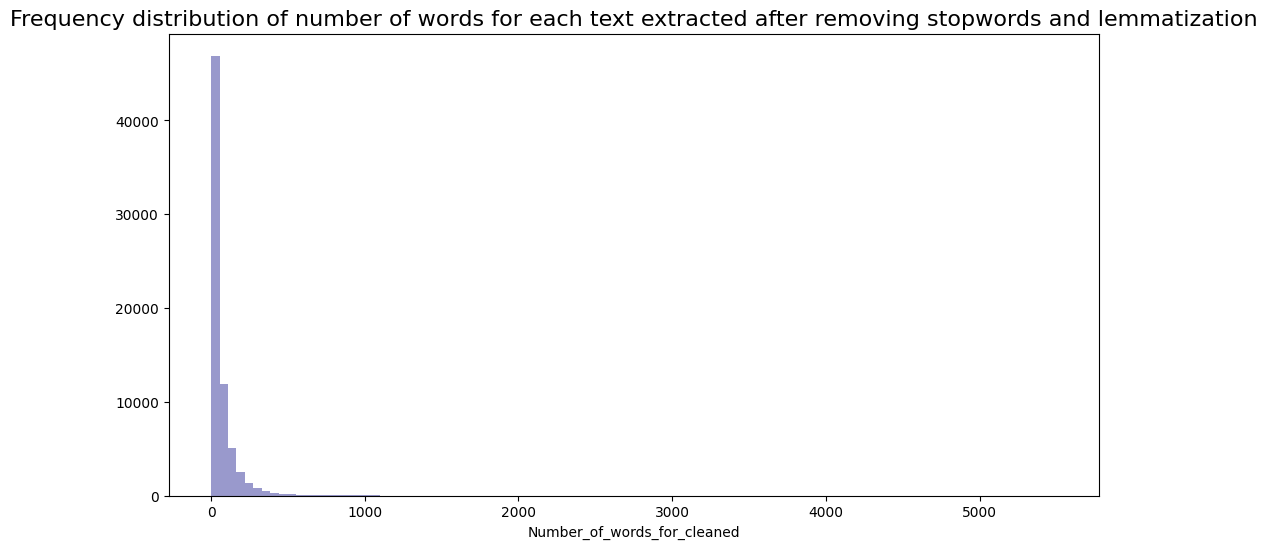

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.distplot(df['Number_of_words_for_cleaned'],kde = False, color= "navy", bins = 100)
plt.title("Frequency distribution of number of words for each text extracted after removing stopwords and lemmatization", size=16)
plt.show()

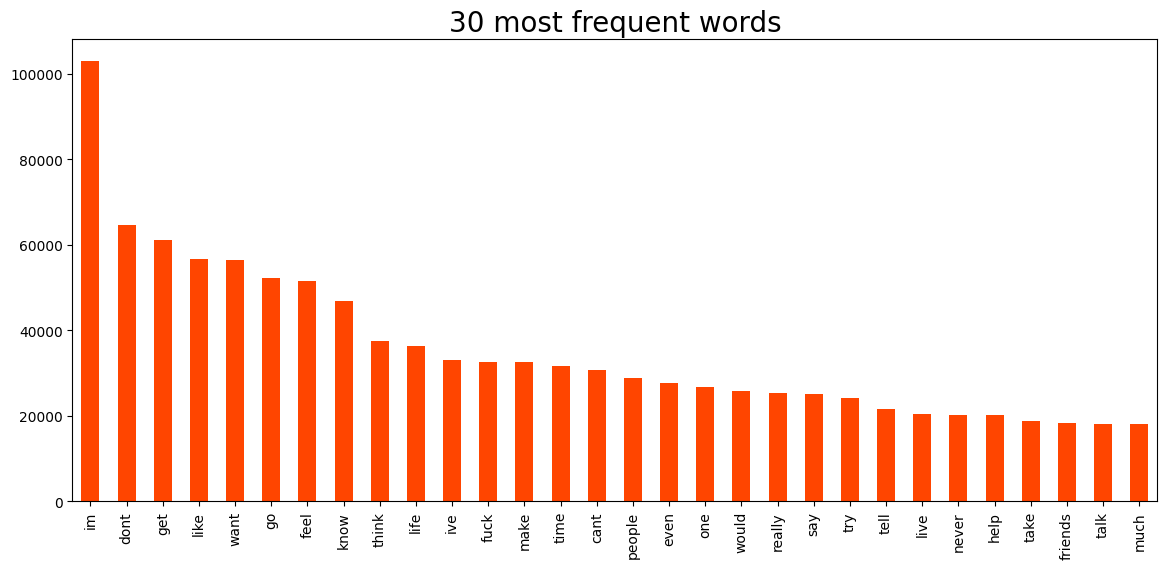

In [ ]:
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df["lemmatize_joined"]).split()).value_counts()[:30]
freq.plot(kind="bar", color = "orangered")
plt.title("30 most frequent words",size=20)
plt.show()

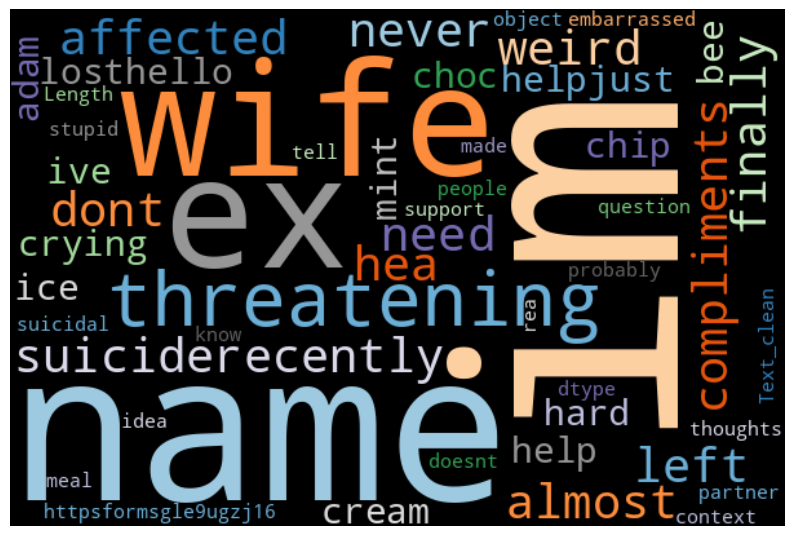

In [ ]:
from wordcloud import WordCloud
cloud=WordCloud(colormap='tab20c',width=600,height=400).generate(str(df["Text_clean"]))
fig=plt.figure(figsize=(10,15))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.show()

Ngrams

In [ ]:
import plotly.graph_objects as go

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize;
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)

df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])

fig = go.Figure([go.Bar(x=df1['text'], y=df1['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 words in the dataset before removing stop words"))
fig.show()

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df["Text_clean"], 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in the text after removing stop words and lemmatization"))
fig.show()

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df["text"], 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in text"))
fig.show()

2023-12-07 17:03:28.156296: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 17:03:28.156375: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 17:03:28.156426: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 17:03:28.169475: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 17:03:30.040810: W tensorflow/compiler/

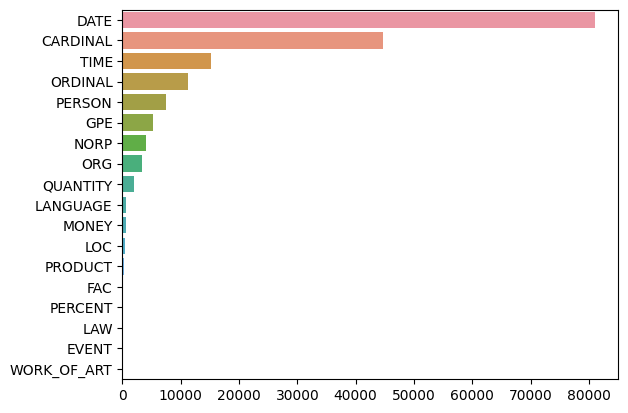

In [ ]:
from collections import Counter
import sys
!{sys.executable} -m spacy download en_core_web_sm
# Spacy for preprocessing
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
def plot_named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")

    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]

    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()

    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)

plot_named_entity_barchart(df['Text_clean'])

Word2Vec

In [ ]:
all_words = df["text"].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(all_words,
                     min_count=600,
                     window=10,
                     #size=250,
                     alpha=0.03,
                     min_alpha=0.0007,
                     workers = 4,
                     seed = 42)

In [ ]:
w2v_model.wv.index_to_key

['I',
 '.',
 ',',
 'to',
 'and',
 'the',
 'a',
 'my',
 'of',
 'it',
 'me',
 'that',
 '’',
 "n't",
 'in',
 'do',
 'is',
 'have',
 'for',
 'i',
 'just',
 'but',
 'was',
 "'m",
 'this',
 'with',
 'so',
 'be',
 'you',
 'like',
 'on',
 '?',
 'not',
 "'s",
 'want',
 'about',
 'all',
 'know',
 'or',
 't',
 'feel',
 'at',
 'life',
 'out',
 'can',
 'myself',
 'up',
 'if',
 'get',
 'because',
 'what',
 'her',
 'they',
 'am',
 'she',
 'been',
 'as',
 'no',
 'm',
 'would',
 ')',
 'are',
 'people',
 "'ve",
 '(',
 'had',
 'time',
 'even',
 'one',
 'really',
 'now',
 'when',
 'he',
 'how',
 'will',
 'from',
 'think',
 'them',
 'going',
 's',
 'It',
 'go',
 '!',
 'My',
 'only',
 'never',
 'ca',
 'who',
 'there',
 'an',
 'much',
 'we',
 'more',
 'friends',
 'has',
 '...',
 'did',
 ':',
 'could',
 ';',
 'some',
 'being',
 'day',
 'help',
 '*',
 'don',
 'years',
 "''",
 'got',
 'him',
 'The',
 'make',
 'things',
 '``',
 'too',
 'any',
 'But',
 'good',
 'by',
 'anything',
 'then',
 'way',
 'here',
 'schoo

In [ ]:
v1 = w2v_model.wv['die']
print(v1)

[-0.01656012 -1.7131358  -0.09624957 -3.054288    1.8481854  -4.3829455
  1.5676743   0.29733747 -1.5906522   5.099951    1.3984878  -2.5427542
  2.3415697  -0.5322488   1.1859593   2.8046238  -2.319534   -1.5975673
 -1.9541273   1.12719     0.52480924 -0.7334962   3.2115426  -4.930841
 -1.0315009  -1.4635807   0.4215247   0.63209593  0.10335546 -2.249634
  0.10248864 -3.4661367  -1.0411446   2.9805512  -1.2724049  -1.8033476
  0.6938161  -4.3397474  -4.2274704   2.1040442  -3.0417728  -0.695654
  2.0104563  -1.9942942   0.5602244  -2.2543266  -0.5196703  -1.7350476
 -1.5876626   1.8630496   1.2265964   0.5577995   1.5125577  -1.027955
 -2.09221     1.7761525   6.4169593   2.66189     1.2226387   1.8583586
  0.00933917  0.05589342 -1.0777882   4.1776066  -2.4164255  -2.3233685
 -0.11373189 -0.77969456  2.2942984   1.2836883  -0.6158414   2.5823781
  0.84133494 -0.7874491  -0.4480739  -0.22722903 -3.464209   -1.4618119
 -1.3226708   0.8291202  -2.1058211   0.34111485 -0.3040787   1.8007

In [ ]:
sim_words = w2v_model.wv.most_similar('help')
print(sim_words)

[('advice', 0.5728095769882202), ('support', 0.5703648924827576), ('vent', 0.5393311977386475), ('Help', 0.5368391871452332), ('explain', 0.5332390666007996), ('tell', 0.49944809079170227), ('fix', 0.47687309980392456), ('stop', 0.4637908637523651), ('talk', 0.4610207974910736), ('accept', 0.44102486968040466)]


t-SNE

In [ ]:
import matplotlib.cm as cm

In [ ]:
from sklearn.manifold import TSNE
def tsne_plot():
    labels = []
    tokens = []

    # Extracting words and their vectors from our trained model
    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)

    # Train t-SNE
    tsne_model = TSNE(perplexity=45, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.xlabel("dimension 1")
        plt.ylabel("dimension 2")
    plt.show()

In [ ]:
type(all_words)

pandas.core.series.Series

In [ ]:
# Words that occur atleast 50 times
model = Word2Vec(all_words, window=20, min_count=50, workers=4)

In [ ]:
model.wv.most_similar('die')

[('disappear', 0.6950932145118713),
 ('live', 0.6424233913421631),
 ('death', 0.6397140026092529),
 ('end', 0.610454797744751),
 ('survive', 0.591528058052063),
 ('suffer', 0.5883954167366028),
 ('dieI', 0.5737757682800293),
 ('kill', 0.555905818939209),
 ('be', 0.5555461645126343),
 ('continue', 0.5551039576530457)]

In [ ]:
keys = ['die', 'hopeless', 'suicide', 'despair']

# this array will contain the vectors(dimension 100) and the labels
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=50, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

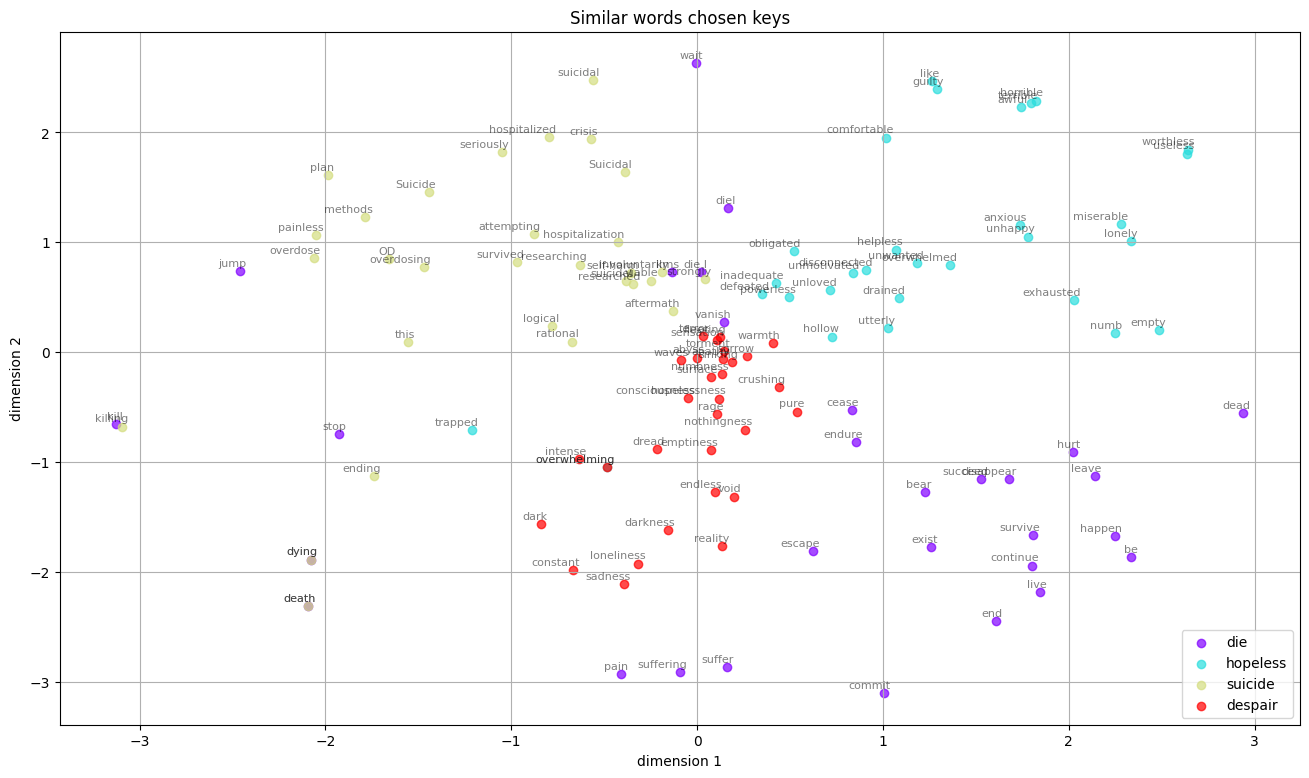

In [ ]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words chosen keys', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

LDA

In [ ]:
import re, nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        output.append([token.lemma_ for token in doc if
        token.pos_ in allowed_postags])
    return output
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# remove short words (length < 3)
df['Text_clean'] = df['Text_clean'].apply(lambda x: ' '.join([w for
                   w in x.split() if len(w)>2]))
# remove stopwords from the text
text = [remove_stopwords(r.split()) for r in df['Text_clean']]
# make entire text lowercase
text = [r.lower() for r in text]

In [ ]:
tokenized_text = pd.Series(text).apply(lambda x: x.split())
print(tokenized_text[1])

['weird', 'dont', 'get', 'affected', 'compliments', 'coming', 'someone', 'know', 'irl', 'feel', 'really', 'good', 'internet', 'strangers']


In [ ]:
nlp = spacy.load("en_core_web_sm")
text_2 = lemmatization(tokenized_text)
print(text_2[1]) # print lemmatized headline

['weird', 'get', 'affect', 'compliment', 'come', 'know', 'irl', 'feel', 'really', 'good', 'internet', 'stranger']


In [ ]:
ntopics = 4
dictionary = corpora.Dictionary(text_2)
doc_term_matrix = [dictionary.doc2bow(text) for lyric in text_2]

In [ ]:
import time
t0 = time.time()
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary,
                num_topics=ntopics, random_state=100, chunksize=1000,
                passes=50)
print('\nThe LDA_MODEL dataset done in '+'%s seconds'% (time.time() - t0))


The LDA_MODEL dataset done in 677.3147797584534 seconds


In [ ]:
## word lists
for i in range(0,ntopics):
    temp = lda_model.show_topic(i, 10)
    terms = []
    for term in temp:
        terms.append(term)
    print("\nTop 10 terms for topic #" + str(i) + ": "+ ", ".join([i[0] for i in terms]))


Top 10 terms for topic #0: tried, heartdelete, tell, life, gorl, going, hey, helphelp, isk, bored

Top 10 terms for topic #1: tried, heartdelete, tell, life, gorl, going, hey, helphelp, isk, bored

Top 10 terms for topic #2: tried, heartdelete, tell, life, gorl, going, hey, helphelp, isk, bored

Top 10 terms for topic #3: hello, woke, heartdelete, tell, life, gorl, going, tried, bored, sexy


In [ ]:

def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(ntopics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [ ]:
get_lda_topics(lda_model, ntopics)

Topic # 01  \
0                                               going   
1                                            therelol   
2                                             goodbye   
3                                                read   
4                                             deleted   
5                                             curious   
6                                            anything   
7                                    inadequateplease   
8   cthgisnialpnidenodnaba60117102mocefilretfalaru...   
9                                                tell   
10                                               life   
11                                               gorl   
12                                              tried   
13                                        heartdelete   
14                                              bored   
15                                           helphelp   
16                                                hey   
17                                                isk   
18                                               sexy   
19                                                pog   

                                           Topic # 02  \
0                                               going   
1                                            therelol   
2                                             goodbye   
3                                                read   
4                                             deleted   
5                                             curious   
6                                            anything   
7                                    inadequateplease   
8   cthgisnialpnidenodnaba60117102mocefilretfalaru...   
9                                                tell   
10                                               life   
11                                               gorl   
12                                              tried   
13                                        heartdelete   
14                                              bored   
15                                           helphelp   
16                                                hey   
17                                                isk   
18                                               sexy   
19                                                pog   

                                           Topic # 03  \
0                                               going   
1                                            therelol   
2                                             goodbye   
3                                                read   
4                                             deleted   
5                                             curious   
6                                            anything   
7                                    inadequateplease   
8   cthgisnialpnidenodnaba60117102mocefilretfalaru...   
9                                                tell   
10                                               life   
11                                               gorl   
12                                              tried   
13                                        heartdelete   
14                                              bored   
15                                           helphelp   
16                                                hey   
17                                                isk   
18                                               sexy   
19                                                pog   

                                           Topic # 04  
0                                               hello  
1                                                woke  
2                                               going  
3                                                read  
4                                             deleted  
5                                             curious  
6                                             goodbye  
7

In [ ]:
# Assign each document to most prevalent topic
lda_topic_assignment = [max(p,key=lambda item: item[1]) for p in lda_model[doc_term_matrix]]

In [ ]:
Topic_list_cln =[p[0] for p in lda_topic_assignment ]

In [ ]:
df["Topic_LDA"] = Topic_list_cln

Vizualisation using Wordcloud

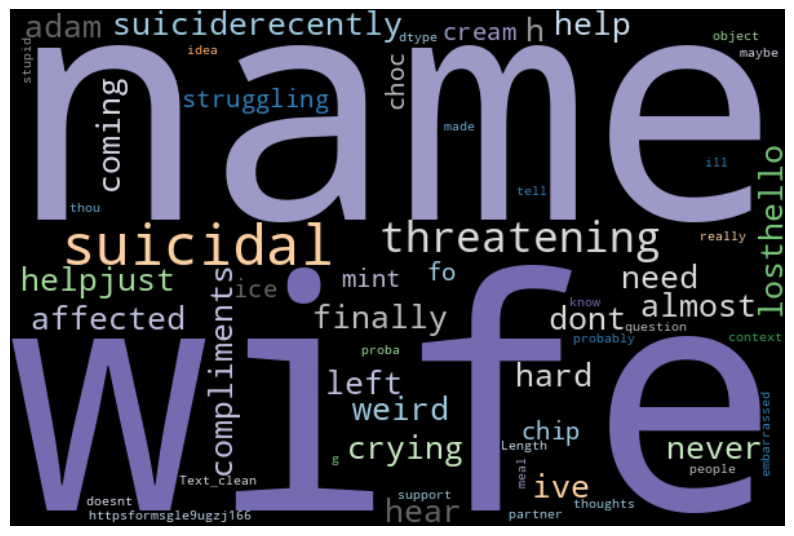

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

from wordcloud import WordCloud
cloud=WordCloud(colormap='tab20c',width=600,height=400).generate(str(df["Text_clean"]))
fig=plt.figure(figsize=(10,15))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.show()

LDA Topics

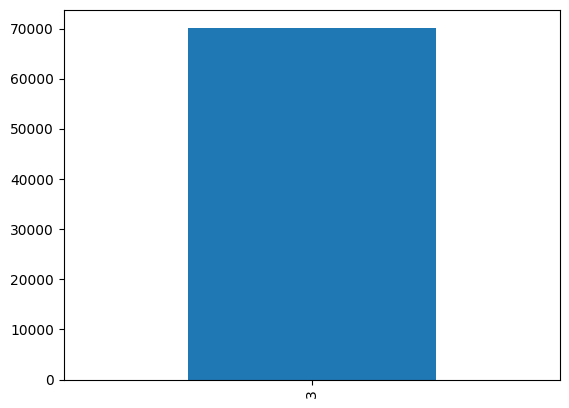

In [ ]:
df['Topic_LDA'].value_counts().plot(kind = 'bar')
plt.show()

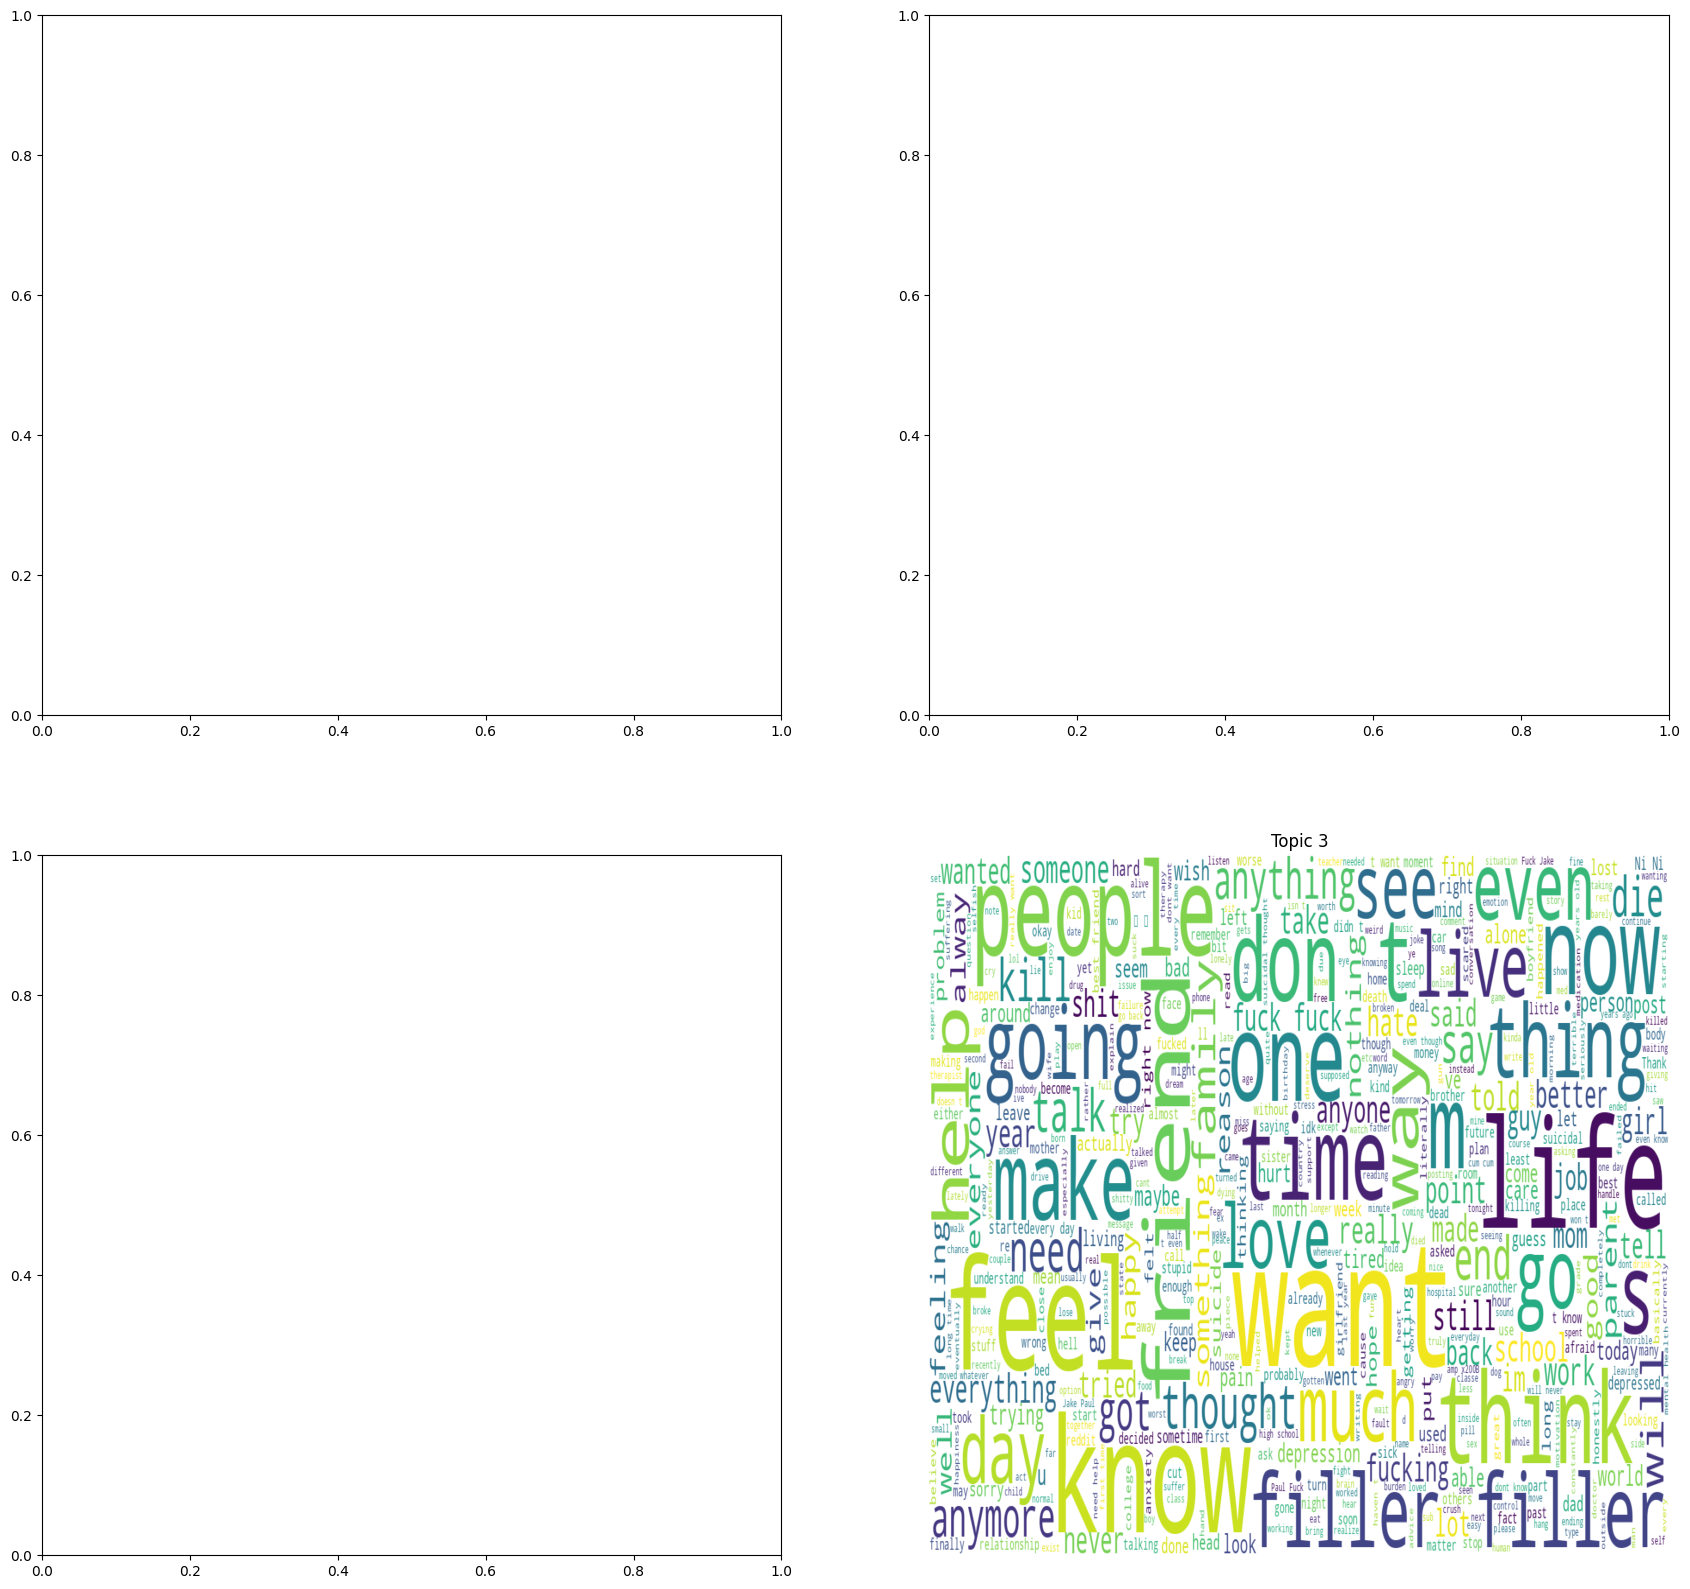

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(21,20))

for item  in enumerate(list(df['Topic_LDA'].unique())):
    wc = WordCloud(background_color="White",stopwords = stopwords,
               max_words=1000, max_font_size= 200,  width=1600, height=800,min_font_size = 10)
    wc.generate(" ".join(df[df['Topic_LDA']== item[1]]['text']))

    axs[item[1]//2, item[1]%2].set_title("Topic %d" % item[1])
    axs[item[1]//2, item[1]%2].imshow(wc, aspect='auto', interpolation='bilinear')
    axs[item[1]//2, item[1]%2].axis("off")

NMF Topics

In [ ]:
vectorizer = CountVectorizer(analyzer='word', max_features=5000);
cln_counts = vectorizer.fit_transform(df['Text_clean'])

In [ ]:
transformer_cln = TfidfTransformer(smooth_idf=False);
x_tfidf_cln = transformer_cln.fit_transform(cln_counts);

In [ ]:
xtfidf_norm_cln = normalize(x_tfidf_cln, norm='l1', axis=1)

In [ ]:
#obtain a NMF model.
model_cln = NMF(n_components=ntopics, random_state = 50,init='nndsvd');
#fit the model
W_mat_cln = model_cln.fit_transform(xtfidf_norm_cln)
H_mat_cln = model_cln.components_

In [ ]:
df["Topic_NMF"] = np.argmax(W_mat_cln, axis =1)

In [ ]:
def get_nmf_topics(model, n_top_words):

    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()

    word_dict = {};
    for i in range(ntopics):

        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;

    return pd.DataFrame(word_dict);

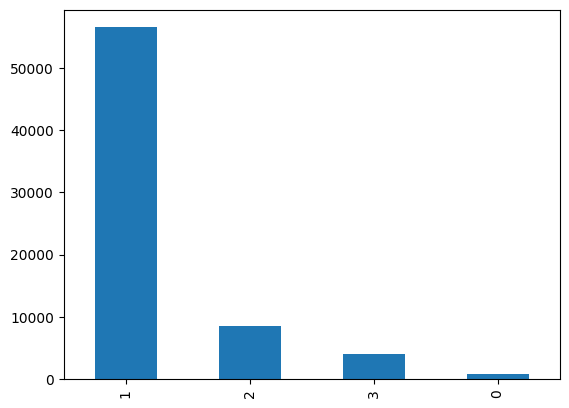

In [ ]:
df['Topic_NMF'].value_counts().plot(kind = 'bar')
plt.show()

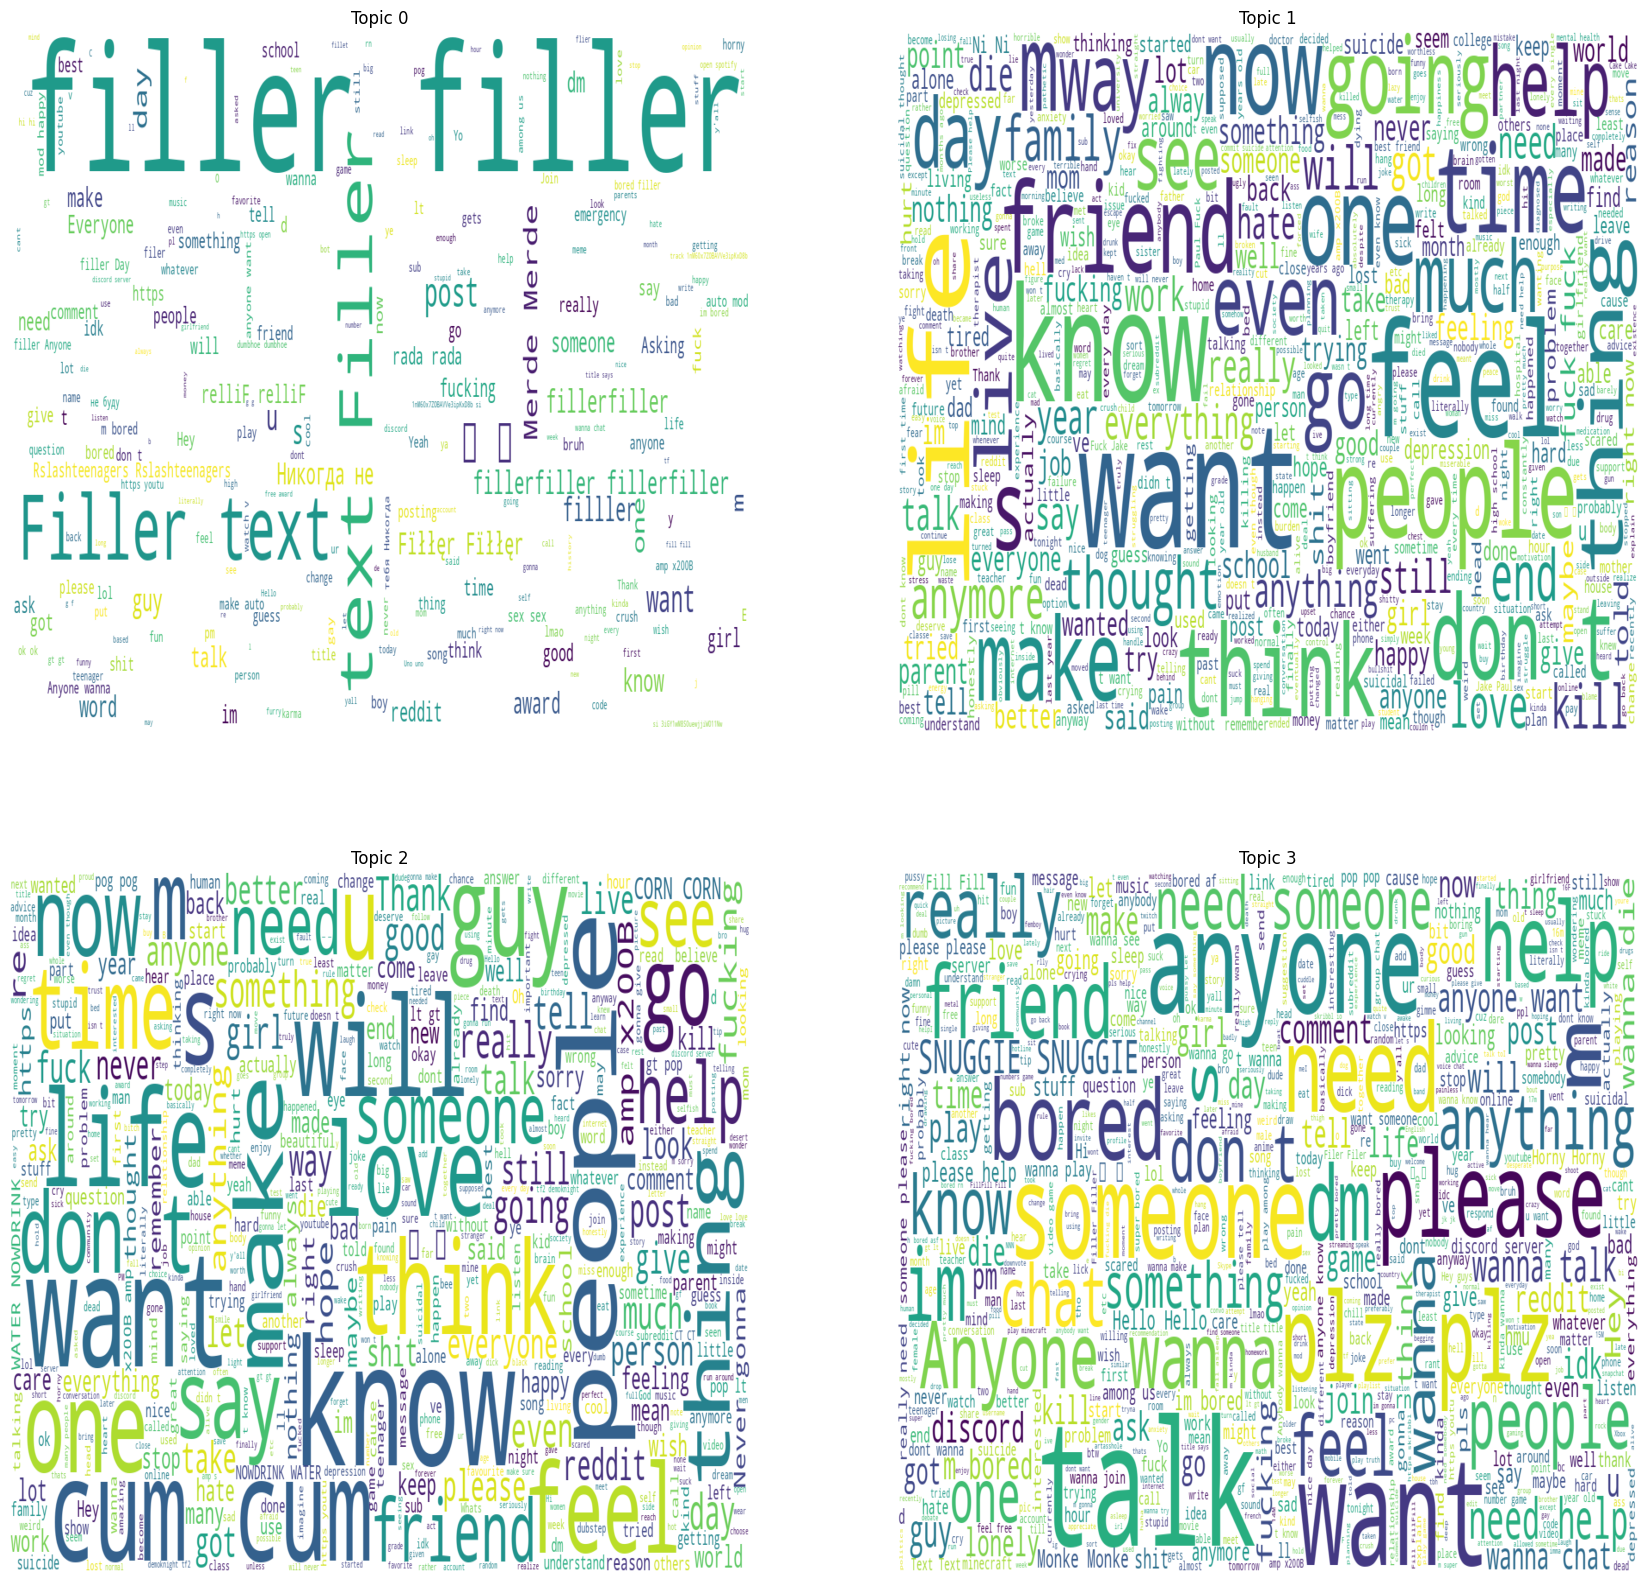

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(21,20))

for item  in enumerate(list(df['Topic_NMF'].unique())):
    wc = WordCloud(background_color="White",stopwords = stopwords,
               max_words=1000, max_font_size= 200,  width=1600, height=800,min_font_size = 10)
    wc.generate(" ".join(df[df['Topic_NMF']== item[1]]['text']))

    axs[item[1]//2, item[1]%2].set_title("Topic %d" % item[1])
    axs[item[1]//2, item[1]%2].imshow(wc, aspect='auto', interpolation='bilinear')
    axs[item[1]//2, item[1]%2].axis("off")